In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Bangladesh Mens ODI Player Innings Stats - 21st Century.csv')

### Gives information of first and last five data sets

In [3]:
data

,player_name,innings_runs,innings_minutes,innings_batted,balls_faced,fours,sixes,strike_rate,innings_number,opposition,ground,innings_date,fifties,hundreds
0,Liton_Das,176,-,1,143,16,8,123.07,1,v Zimbabwe,Sylhet,06/03/2020,0,1
1,Tamim Iqbal,158,-,1,136,20,3,116.17,1,v Zimbabwe,Sylhet,03/03/2020,0,1
2,Tamim Iqbal,154,191,1,138,7,6,111.59,2,v Zimbabwe,Bulawayo,16/08/2009,0,1
3,Mushfiqur Rahim,144,-,1,150,11,4,96,1,v Sri Lanka,Dubai (DSC),15/09/2018,0,1
4,Imrul Kayes,144,-,1,140,13,6,102.85,1,v Zimbabwe,Dhaka,21/10/2018,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,Mohammad Saifuddin,-,-,0,-,-,-,-,1,v Zimbabwe,Sylhet,06/03/2020,0,0
3691,Taijul Islam,-,-,0,-,-,-,-,1,v Zimbabwe,Sylhet,06/03/2020,0,0
3692,Mohammad Naim,-,-,0,-,-,-,-,1,v Zimbabwe,Sylhet,06/03/2020,0,0
3693,Mohammad Mithun,-,-,0,-,-,-,-,1,v Zimbabwe,Sylhet,06/03/2020,0,0


### Dropping multiple columns

In [4]:
data.drop(columns=['innings_batted', 'innings_number'], inplace=True)
data

,player_name,innings_runs,innings_minutes,balls_faced,fours,sixes,strike_rate,opposition,ground,innings_date,fifties,hundreds
0,Liton_Das,176,-,143,16,8,123.07,v Zimbabwe,Sylhet,06/03/2020,0,1
1,Tamim Iqbal,158,-,136,20,3,116.17,v Zimbabwe,Sylhet,03/03/2020,0,1
2,Tamim Iqbal,154,191,138,7,6,111.59,v Zimbabwe,Bulawayo,16/08/2009,0,1
3,Mushfiqur Rahim,144,-,150,11,4,96,v Sri Lanka,Dubai (DSC),15/09/2018,0,1
4,Imrul Kayes,144,-,140,13,6,102.85,v Zimbabwe,Dhaka,21/10/2018,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3690,Mohammad Saifuddin,-,-,-,-,-,-,v Zimbabwe,Sylhet,06/03/2020,0,0
3691,Taijul Islam,-,-,-,-,-,-,v Zimbabwe,Sylhet,06/03/2020,0,0
3692,Mohammad Naim,-,-,-,-,-,-,v Zimbabwe,Sylhet,06/03/2020,0,0
3693,Mohammad Mithun,-,-,-,-,-,-,v Zimbabwe,Sylhet,06/03/2020,0,0


In [5]:
data.shape

(3695, 12)

### Getting column names

In [6]:
data.columns

Index(['player_name', 'innings_runs', 'innings_minutes', 'balls_faced',
       'fours', 'sixes', 'strike_rate', 'opposition', 'ground', 'innings_date',
       'fifties', 'hundreds'],
      dtype='object')

### Selecting multiple columns and displaying all rows

In [7]:
###pd.set_option('display.max_rows', None)
data[['player_name','innings_runs']]

,player_name,innings_runs
0,Liton_Das,176
1,Tamim Iqbal,158
2,Tamim Iqbal,154
3,Mushfiqur Rahim,144
4,Imrul Kayes,144
...,...,...
3690,Mohammad Saifuddin,-
3691,Taijul Islam,-
3692,Mohammad Naim,-
3693,Mohammad Mithun,-


## Give Information about every columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      3695 non-null   object
 1   innings_runs     3695 non-null   object
 2   innings_minutes  3695 non-null   object
 3   balls_faced      3695 non-null   object
 4   fours            3695 non-null   object
 5   sixes            3695 non-null   object
 6   strike_rate      3695 non-null   object
 7   opposition       3695 non-null   object
 8   ground           3695 non-null   object
 9   innings_date     3695 non-null   object
 10  fifties          3695 non-null   int64 
 11  hundreds         3695 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 346.5+ KB


### Converting object to int/float data type for analyzing data
### to_numeric() method used to avoid Value Error Could Not Convert String To Float.

In [9]:
data['innings_minutes'] = pd.to_numeric(data['innings_minutes'], errors='coerce')
data['innings_minutes'] = data['innings_minutes'].astype(float)

### Additionally used numpy.nan_to_num() function to replace nan(Not A Number) with zero and inf with finite numbers

In [10]:
data['balls_faced'] = pd.to_numeric(data['balls_faced'], errors='coerce')
data['balls_faced']=np.nan_to_num(data['balls_faced']).astype(int)

In [11]:
data['fours'] = pd.to_numeric(data['fours'], errors='coerce')
data['fours']=np.nan_to_num(data['fours']).astype(int)

In [12]:
data['sixes'] = pd.to_numeric(data['sixes'], errors='coerce')
data['sixes']=np.nan_to_num(data['sixes']).astype(int)

In [13]:
data['strike_rate'] = pd.to_numeric(data['strike_rate'], errors='coerce')
data['strike_rate']=np.nan_to_num(data['strike_rate']).astype(float)

### Wanted to keep the non-finite values (NaN) intact, so used the Int64 data type

In [14]:
data['innings_runs'] = pd.to_numeric(data['innings_runs'], errors='coerce')
data['innings_runs'] = data['innings_runs'].astype("Int64")

#### Check data types again after conversion

In [15]:
data.dtypes

player_name         object
innings_runs         Int64
innings_minutes    float64
balls_faced          int32
fours                int32
sixes                int32
strike_rate        float64
opposition          object
ground              object
innings_date        object
fifties              int64
hundreds             int64
dtype: object

### Check the number of null values using the isnull().sum() method

In [16]:
data.isnull().sum()

player_name          0
innings_runs       582
innings_minutes    985
balls_faced          0
fours                0
sixes                0
strike_rate          0
opposition           0
ground               0
innings_date         0
fifties              0
hundreds             0
dtype: int64

### Cleaning the data by making the null or NAN values to 0.

In [17]:
data['innings_runs'] = data['innings_runs'].fillna(0)
data['innings_minutes'] = data['innings_minutes'].fillna(0)

### Again checking null values

In [44]:
data.isnull().sum()

player_name        0
innings_runs       0
innings_minutes    0
balls_faced        0
fours              0
sixes              0
strike_rate        0
opposition         0
ground             0
innings_date       0
fifties            0
hundreds           0
dtype: int64

## Total hundreds scored by players

In [18]:
data['hundreds'].value_counts()

hundreds
0    3639
1      56
Name: count, dtype: int64

## Total fifties scored by players

In [19]:
data['fifties'].value_counts()

fifties
0    3361
1     334
Name: count, dtype: int64

### Selecting Rows in Pandas DataFrame Based on Conditions

In [20]:
data[(data.strike_rate >=100) & (data.innings_runs >=100)]

,player_name,innings_runs,innings_minutes,balls_faced,fours,sixes,strike_rate,opposition,ground,innings_date,fifties,hundreds
0,Liton_Das,176,0.0,143,16,8,123.07,v Zimbabwe,Sylhet,06/03/2020,0,1
1,Tamim Iqbal,158,0.0,136,20,3,116.17,v Zimbabwe,Sylhet,03/03/2020,0,1
2,Tamim Iqbal,154,191.0,138,7,6,111.59,v Zimbabwe,Bulawayo,16/08/2009,0,1
4,Imrul Kayes,144,0.0,140,13,6,102.85,v Zimbabwe,Dhaka,21/10/2018,0,1
9,Mahmudullah,128,175.0,123,12,3,104.06,v New Zealand,Hamilton,13/03/2015,0,1
10,Tamim Iqbal,128,0.0,109,7,6,117.43,v Zimbabwe,Sylhet,06/03/2020,0,1
12,Soumya Sarkar,127,182.0,110,13,6,115.45,v Pakistan,Dhaka,22/04/2015,0,1
14,Liton_Das,126,0.0,105,13,2,120.00,v Zimbabwe,Sylhet,01/03/2020,0,1
15,Tamim Iqbal,125,187.0,120,13,3,104.16,v England,Dhaka,28/02/2010,0,1
16,Shakib Al Hasan,124,170.0,99,16,0,125.25,v West Indies,Taunton,17/06/2019,0,1


## Top 12 Grounds in which most matches were played

Text(0, 0.5, 'Ground Name')

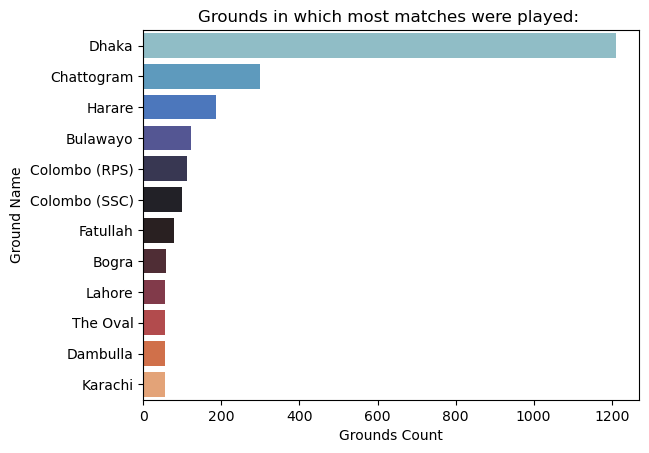

In [21]:
sns.barplot(x = data['ground'].value_counts().head(12).values, y = data['ground'].value_counts().head(12).index, data = data, palette="icefire")
plt.title("Grounds in which most matches were played: ")
plt.xlabel("Grounds Count")
plt.ylabel("Ground Name")

### Getting Top 15 most run scorers using groupby() function to group data based on 'player_name' and 'innings_runs' columns and using .sum() method to calculate the sum of values within each group

In [22]:
top_scorers=data.groupby('player_name')['innings_runs'].sum().sort_values(ascending=False).head(15).reset_index()

In [23]:
top_scorers

,player_name,innings_runs
0,Tamim Iqbal,7202
1,Shakib Al Hasan,6323
2,Mushfiqur Rahim,6174
3,Mahmudullah,4070
4,Mohammad Ashraful,3468
5,Imrul Kayes,2434
6,Shahriar Nafees,2201
7,Aftab Ahmed,1954
8,Habibul Bashar,1931
9,Mashrafe Mortaza,1773


[Text(0, 0, 'Tamim Iqbal'),
 Text(1, 0, 'Shakib Al Hasan'),
 Text(2, 0, 'Mushfiqur Rahim'),
 Text(3, 0, 'Mahmudullah'),
 Text(4, 0, 'Mohammad Ashraful'),
 Text(5, 0, 'Imrul Kayes'),
 Text(6, 0, 'Shahriar Nafees'),
 Text(7, 0, 'Aftab Ahmed'),
 Text(8, 0, 'Habibul Bashar'),
 Text(9, 0, 'Mashrafe Mortaza'),
 Text(10, 0, 'Soumya Sarkar'),
 Text(11, 0, 'Khaled Mashud'),
 Text(12, 0, 'Sabbir Rahman'),
 Text(13, 0, 'Raqibul Hasan'),
 Text(14, 0, 'Nasir Hossain')]

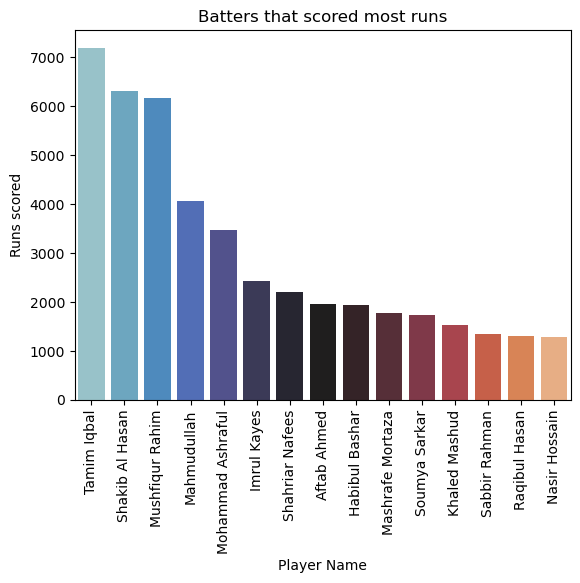

In [24]:
tc = sns.barplot(x="player_name",y="innings_runs",data=top_scorers,palette="icefire")
plt.title("Batters that scored most runs")
plt.xlabel("Player Name")
plt.ylabel("Runs scored")

tc.set_xticklabels(tc.get_xticklabels(), rotation=90)

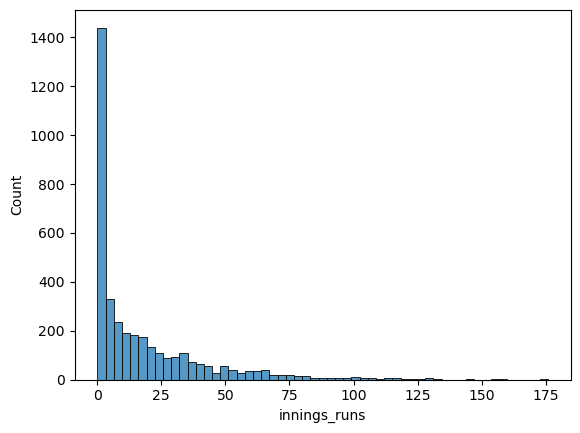

In [25]:
sns.histplot(data["innings_runs"])
plt.show()

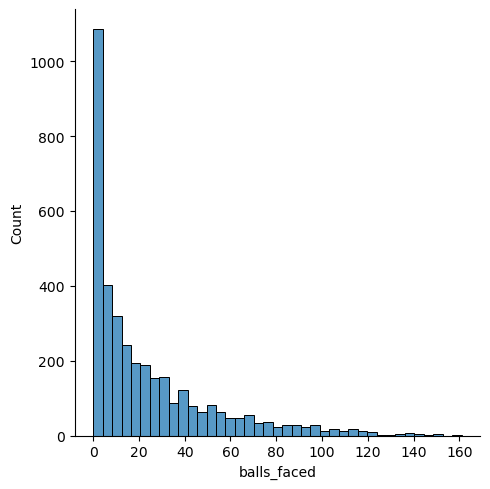

In [26]:
sns.displot(data["balls_faced"])
plt.show()

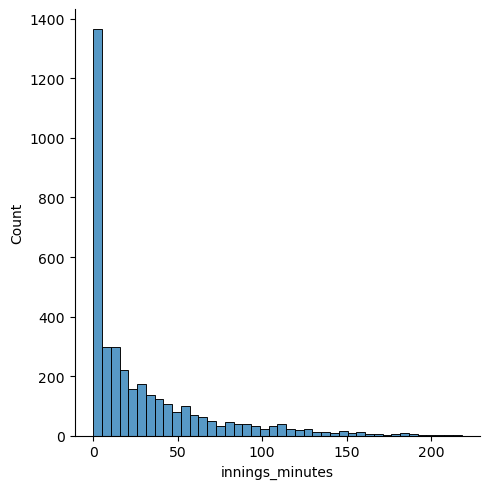

In [27]:
sns.displot(data["innings_minutes"])
plt.show()

### Getting data of most oppositions faced

In [28]:
most_oppositions=data['opposition'].value_counts()

In [29]:
most_oppositions

opposition
v Zimbabwe        781
v Sri Lanka       468
v West Indies     385
v New Zealand     363
v Pakistan        319
v India           308
v South Africa    231
v England         220
v Australia       209
v Ireland         110
v Kenya            92
v Afghanistan      88
v Scotland         33
v Bermuda          22
v Canada           22
v Netherlands      22
v U.A.E.           11
v Hong Kong        11
Name: count, dtype: int64

Text(0, 0.5, 'Opposition')

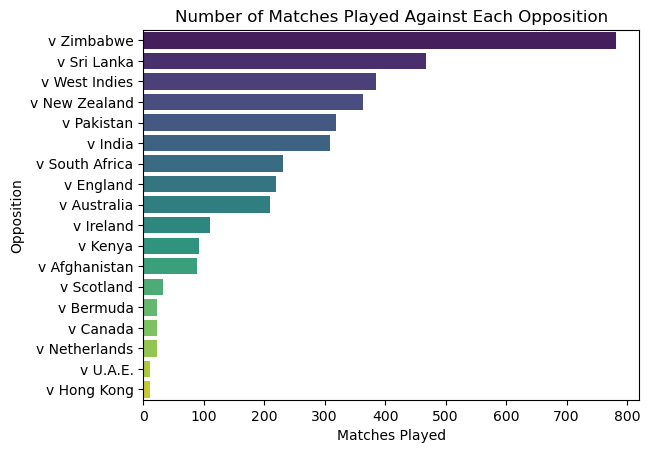

In [30]:
sns.barplot(x = data['opposition'].value_counts().values, y = data['opposition'].value_counts().index, data = data, palette='viridis')
plt.title('Number of Matches Played Against Each Opposition')
plt.xlabel('Matches Played')
plt.ylabel('Opposition')

### Getting data of batters that played most balls

In [31]:
most_balls_faced=data.groupby('player_name')['balls_faced'].agg('sum').sort_values(ascending=False).head(15).reset_index()

In [32]:
most_balls_faced

,player_name,balls_faced
0,Tamim Iqbal,9153
1,Mushfiqur Rahim,7794
2,Shakib Al Hasan,7641
3,Mahmudullah,5311
4,Mohammad Ashraful,4946
5,Imrul Kayes,3423
6,Habibul Bashar,3177
7,Shahriar Nafees,3167
8,Khaled Mashud,2777
9,Aftab Ahmed,2353


[Text(0, 0, 'Tamim Iqbal'),
 Text(1, 0, 'Mushfiqur Rahim'),
 Text(2, 0, 'Shakib Al Hasan'),
 Text(3, 0, 'Mahmudullah'),
 Text(4, 0, 'Mohammad Ashraful'),
 Text(5, 0, 'Imrul Kayes'),
 Text(6, 0, 'Habibul Bashar'),
 Text(7, 0, 'Shahriar Nafees'),
 Text(8, 0, 'Khaled Mashud'),
 Text(9, 0, 'Aftab Ahmed'),
 Text(10, 0, 'Raqibul Hasan'),
 Text(11, 0, 'Javed Omar'),
 Text(12, 0, 'Mashrafe Mortaza'),
 Text(13, 0, 'Rajin Saleh'),
 Text(14, 0, 'Alok Kapali')]

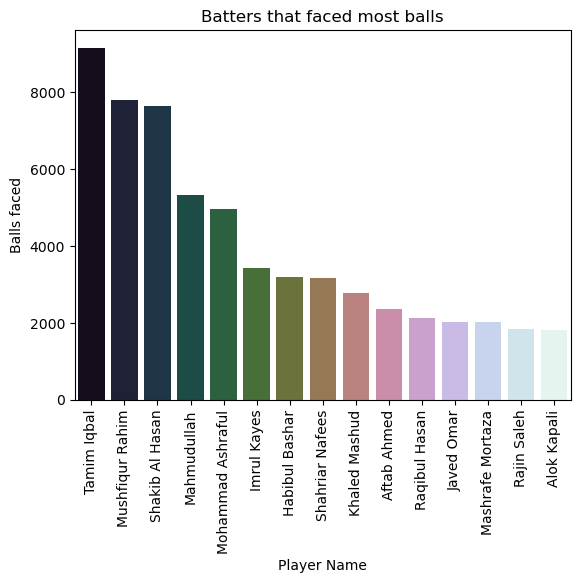

In [33]:
bf = sns.barplot(x="player_name",y="balls_faced",data=most_balls_faced,palette="cubehelix")
plt.title("Batters that faced most balls")
plt.xlabel("Player Name")
plt.ylabel("Balls faced")

bf.set_xticklabels(bf.get_xticklabels(), rotation=90)

### Calculating average strike rate of players based on the total amount of runs they scored and the total amount of balls the faced

In [34]:
batter_runs = data.groupby('player_name')['innings_runs'].agg('sum').sort_values(ascending=False).reset_index()

In [35]:
batter_bf = data.groupby('player_name')['balls_faced'].agg('sum').sort_values(ascending=False).reset_index()

### Combining data from two DataFrames into a single DataFrame using pd.merge() function

In [36]:
batter_cons = pd.merge(batter_runs,batter_bf,on='player_name')
batter_cons.head(9)

,player_name,innings_runs,balls_faced
0,Tamim Iqbal,7202,9153
1,Shakib Al Hasan,6323,7641
2,Mushfiqur Rahim,6174,7794
3,Mahmudullah,4070,5311
4,Mohammad Ashraful,3468,4946
5,Imrul Kayes,2434,3423
6,Shahriar Nafees,2201,3167
7,Aftab Ahmed,1954,2353
8,Habibul Bashar,1931,3177


In [37]:
batter_cons['SR'] = batter_cons['innings_runs']/batter_cons['balls_faced']*100
batter_cons.head(9)

,player_name,innings_runs,balls_faced,SR
0,Tamim Iqbal,7202,9153,78.684584
1,Shakib Al Hasan,6323,7641,82.750949
2,Mushfiqur Rahim,6174,7794,79.214781
3,Mahmudullah,4070,5311,76.633402
4,Mohammad Ashraful,3468,4946,70.117266
5,Imrul Kayes,2434,3423,71.107216
6,Shahriar Nafees,2201,3167,69.497948
7,Aftab Ahmed,1954,2353,83.042924
8,Habibul Bashar,1931,3177,60.780611


### Getting top 15 fastest run scorers based on their strikerate that also scored 1000 runs using nlargest() function 

In [38]:
batter_cons_1 = batter_cons[batter_cons['innings_runs']>=1000]
top_15_fastest = batter_cons_1.nlargest(15, 'SR').reset_index()

In [39]:
top_15_fastest

,index,player_name,innings_runs,balls_faced,SR
0,10,Soumya Sarkar,1728,1753,98.573873
1,17,Liton_Das,1079,1133,95.233892
2,12,Sabbir Rahman,1333,1461,91.238877
3,9,Mashrafe Mortaza,1773,2021,87.728847
4,7,Aftab Ahmed,1954,2353,83.042924
5,1,Shakib Al Hasan,6323,7641,82.750949
6,14,Nasir Hossain,1281,1605,79.813084
7,2,Mushfiqur Rahim,6174,7794,79.214781
8,0,Tamim Iqbal,7202,9153,78.684584
9,3,Mahmudullah,4070,5311,76.633402


[Text(0, 0, 'Soumya Sarkar'),
 Text(1, 0, 'Liton_Das'),
 Text(2, 0, 'Sabbir Rahman'),
 Text(3, 0, 'Mashrafe Mortaza'),
 Text(4, 0, 'Aftab Ahmed'),
 Text(5, 0, 'Shakib Al Hasan'),
 Text(6, 0, 'Nasir Hossain'),
 Text(7, 0, 'Mushfiqur Rahim'),
 Text(8, 0, 'Tamim Iqbal'),
 Text(9, 0, 'Mahmudullah'),
 Text(10, 0, 'Imrul Kayes'),
 Text(11, 0, 'Anamul Haque'),
 Text(12, 0, 'Mohammad Ashraful'),
 Text(13, 0, 'Shahriar Nafees'),
 Text(14, 0, 'Junaid Siddique')]

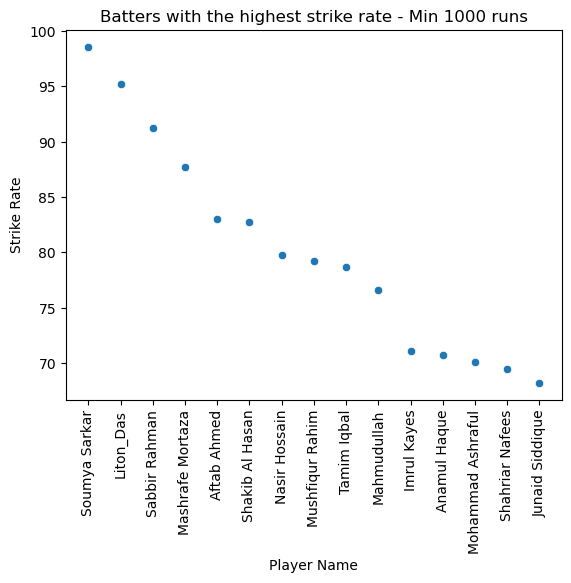

In [40]:
stk = sns.scatterplot(x='player_name',y='SR',data=top_15_fastest)
plt.title("Batters with the highest strike rate - Min 1000 runs")
plt.xlabel("Player Name")
plt.ylabel("Strike Rate")

stk.set_xticklabels(stk.get_xticklabels(), rotation=90)

### Creating a leaderboard that contains players with most four and sixes scored

In [41]:
most_fours = data.groupby('player_name')['fours'].agg('sum').sort_values(ascending=False).reset_index()
most_sixes = data.groupby('player_name')['sixes'].agg('sum').sort_values(ascending=False).reset_index()
most_boundaries = pd.merge(most_fours,most_sixes,on='player_name')
most_boundaries

,player_name,fours,sixes
0,Tamim Iqbal,783,91
1,Shakib Al Hasan,574,42
2,Mushfiqur Rahim,492,82
3,Mohammad Ashraful,354,29
4,Mahmudullah,317,57
...,...,...,...
94,Fahim Muntasir,0,0
95,Fazle Mahmud,0,0
96,Mosharraf Hossain,0,0
97,Moniruzzaman,0,0


### Getting Total amount of boundaries scored adding the number of fours and sixes hit

In [42]:
most_boundaries['Total boundaries'] = most_boundaries['fours']+most_boundaries['sixes']
top_15_hitters = most_boundaries.nlargest(15,'Total boundaries').reset_index()
most_boundaries.head(15)

,player_name,fours,sixes,Total boundaries
0,Tamim Iqbal,783,91,874
1,Shakib Al Hasan,574,42,616
2,Mushfiqur Rahim,492,82,574
3,Mohammad Ashraful,354,29,383
4,Mahmudullah,317,57,374
5,Shahriar Nafees,277,7,284
6,Imrul Kayes,238,37,275
7,Aftab Ahmed,205,49,254
8,Soumya Sarkar,200,42,242
9,Habibul Bashar,166,6,172


[Text(0, 0, 'Tamim Iqbal'),
 Text(1, 0, 'Shakib Al Hasan'),
 Text(2, 0, 'Mushfiqur Rahim'),
 Text(3, 0, 'Mohammad Ashraful'),
 Text(4, 0, 'Mahmudullah'),
 Text(5, 0, 'Shahriar Nafees'),
 Text(6, 0, 'Imrul Kayes'),
 Text(7, 0, 'Aftab Ahmed'),
 Text(8, 0, 'Soumya Sarkar'),
 Text(9, 0, 'Mashrafe Mortaza'),
 Text(10, 0, 'Sabbir Rahman'),
 Text(11, 0, 'Habibul Bashar'),
 Text(12, 0, 'Liton_Das'),
 Text(13, 0, 'Nasir Hossain'),
 Text(14, 0, 'Javed Omar')]

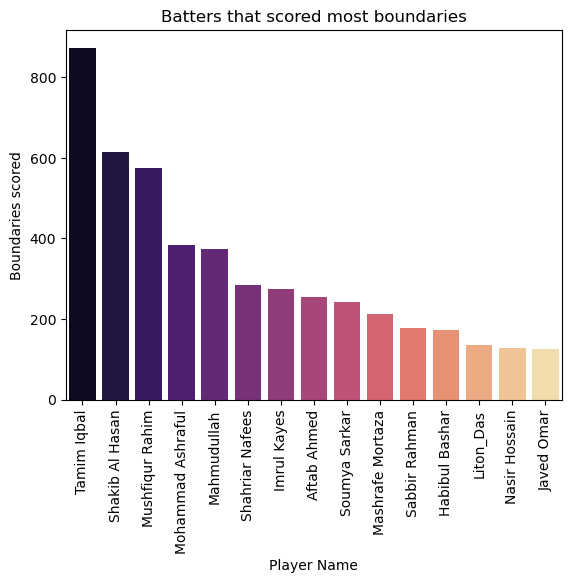

In [43]:
bnd = sns.barplot(x='player_name',y='Total boundaries',data=top_15_hitters, palette="magma")
plt.title("Batters that scored most boundaries")
plt.xlabel("Player Name")
plt.ylabel("Boundaries scored")
bnd.set_xticklabels(bnd.get_xticklabels(), rotation=90)